In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
# function to compute DFT
def direct_dft(f):
    n = len(f)
    dft = np.zeros(n, dtype=np.complex128)

    for q in range(n):
        for p in range(n):
            dft[q] += (f[p] * np.exp(-2j * np.pi * p * q / n))/(np.sqrt(n))

    return dft

Compute the DFT of n numbers using direct computation and using numpy.fft.fft

In [3]:
# Generating random input data
n = 16
input_data = np.random.rand(n)

# Timing direct computation DFT
start_time = time.time()
direct_result = direct_dft(input_data)
direct_time = time.time() - start_time


# Timing numpy fft
start_time = time.time()
fft_result = np.fft.fft(input_data, norm = "ortho")
fft_time = time.time() - start_time

# Print the input numbers
print(f"input numbers: {input_data}")

# Comparing the results
print("\nDirect Computation DFT Result:", direct_result)
print("\nNumpy FFT Result:", fft_result)

# Comparing the time taken
print("\nTime taken by Direct Computation DFT:", direct_time)
print("\nTime taken by NumPy FFT:", fft_time)

input numbers: [0.64752728 0.57522438 0.73439983 0.34721756 0.87429534 0.99628983
 0.29726017 0.75160688 0.91086591 0.81996364 0.72313987 0.5184594
 0.78426861 0.54297254 0.66382218 0.33644197]

Direct Computation DFT Result: [ 2.63093885+0.00000000e+00j -0.21121464-4.11532629e-02j
 -0.01120151-5.93351825e-02j -0.05150403+7.29390159e-02j
  0.19958377-2.45181147e-01j -0.21374553-9.76925985e-02j
 -0.03888387+1.88893496e-01j  0.21312556-1.21758143e-01j
  0.18685075-1.87495266e-16j  0.21312556+1.21758143e-01j
 -0.03888387-1.88893496e-01j -0.21374553+9.76925985e-02j
  0.19958377+2.45181147e-01j -0.05150403-7.29390159e-02j
 -0.01120151+5.93351825e-02j -0.21121464+4.11532629e-02j]

Numpy FFT Result: [ 2.63093885+0.j         -0.21121464-0.04115326j -0.01120151-0.05933518j
 -0.05150403+0.07293902j  0.19958377-0.24518115j -0.21374553-0.0976926j
 -0.03888387+0.1888935j   0.21312556-0.12175814j  0.18685075+0.j
  0.21312556+0.12175814j -0.03888387-0.1888935j  -0.21374553+0.0976926j
  0.19958377+0.2

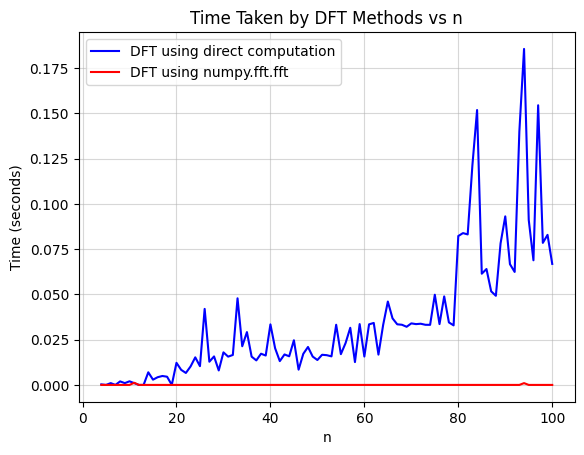

In [4]:
n_values = range(4, 101)
direct_times = []
fft_times = []

for n in n_values:
    # Generating random input data
    input_data = np.random.rand(n) + 1j * np.random.rand(n)
    
    # Timing direct computation DFT
    start_time = time.time()
    direct_result = direct_dft(input_data)
    direct_time = time.time() - start_time
    direct_times.append(direct_time)
    
    # Timing numpy fft
    start_time = time.time()
    fft_result = np.fft.fft(input_data)
    fft_time = time.time() - start_time
    fft_times.append(fft_time)

# Plotting the results
plt.plot(n_values, direct_times, label='DFT using direct computation', color = 'b')
plt.plot(n_values, fft_times, label='DFT using numpy.fft.fft', color = 'r')
plt.xlabel('n')
plt.ylabel('Time (seconds)')
plt.title('Time Taken by DFT Methods vs n')
plt.legend()
plt.grid(True, alpha = 0.5)
plt.show()